# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sneakers = pd.read_csv("orders.csv")
sneakers

#sneakers["order_value"].max()


order_id  shop_id  user_id  order_value  total_items payment_method  \
0            1       53      746          224            2           cash   
1            2       92      925           90            1           cash   
2            3       44      861          144            1           cash   
3            4       18      935          156            1    credit_card   
4            5       18      883          156            1    credit_card   
...        ...      ...      ...          ...          ...            ...   
4995      4996       73      993          330            2          debit   
4996      4997       48      789          234            2           cash   
4997      4998       56      867          351            3           cash   
4998      4999       60      825          354            2    credit_card   
4999      5000       44      734          288            2          debit   

               created_at  
0     2017-03-13 12:36:56  
1     2017-03-03 17:38:52  
2      2017-03-14 4:23:56  
3     2017-03-26 12:43:37  
4      2017-03-01 4:35:11  
...                   ...  
4995  2017-03-30 13:47:17  
4996  2017-03-16 20:36:16  
4997   2017-03-19 5:42:42  
4998  2017-03-16 14:51:18  
4999  2017-03-18 15:48:18  

[5000 rows x 7 columns]

Text(0.5, 1.0, 'Scatterplot of Individual Order Values')

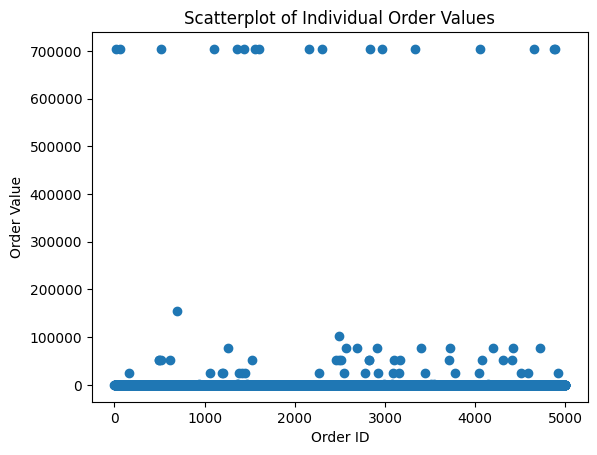

In [55]:
plt.scatter(sneakers['order_id'], sneakers['order_value'])
plt.xlabel("Order ID")
plt.ylabel("Order Value")
plt.title("Scatterplot of Individual Order Values")

In [56]:
sneakers["total_items"].max()

#Since the max number of items ordered was 2000, it would be a much better representation of the data to instead
#use the average sneaker order value by dividing the total order value with the amount of sneakers ordered

sneakers["value_per_item"] = sneakers["order_value"] / sneakers["total_items"]
sneakers["value_per_item"].max()

25725.0

Text(0.5, 1.0, 'Scatterplot of Individual Order Values per Sneaker')

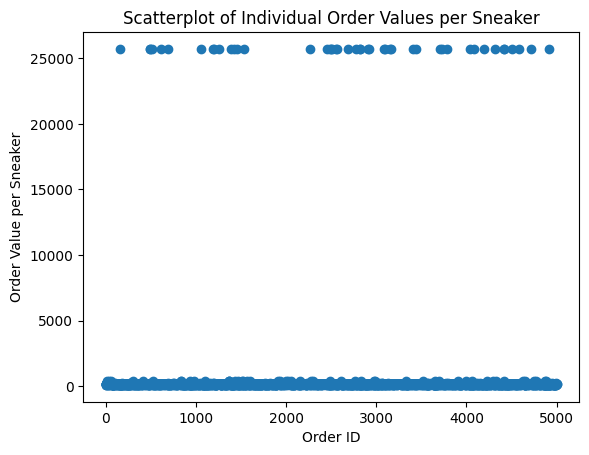

In [57]:
plt.scatter(sneakers['order_id'], sneakers['value_per_item'])
plt.xlabel("Order ID")
plt.ylabel("Order Value per Sneaker")
plt.title("Scatterplot of Individual Order Values per Sneaker")

In [58]:
#By comparing the scatterplots between using the AOV and the order value per sneaker, it is clear that the order value 
#per sneaker is a much better metric of representing the "reasonable" and "logical" costs of sneakers as many of the 
#order (or in this case, order per sneaker) values have decreased. There are still quite a few extreme outliers for order
#value per sneaker which may represent novelty or luxury items.

In [59]:
print(sneakers["value_per_item"].median())
print(sneakers["value_per_item"].mean())

153.0
387.7428


In [60]:
#The disproportionate impact of the outliers is indicated when comparing the median of the order value per item
#with the mean order value per item

In [61]:
import datetime


sneakers["created_at"] = pd.to_datetime(sneakers["created_at"])
sneakers["created_at"] = [datetime.datetime.time(d) for d in sneakers["created_at"]] 
sneakers["created_at"]
#plt.hist(sneakers["created_at"])
#plt.show()

0       12:36:56
1       17:38:52
2       04:23:56
3       12:43:37
4       04:35:11
          ...   
4995    13:47:17
4996    20:36:16
4997    05:42:42
4998    14:51:18
4999    15:48:18
Name: created_at, Length: 5000, dtype: object

TypeError: float() argument must be a string or a number, not 'datetime.time'

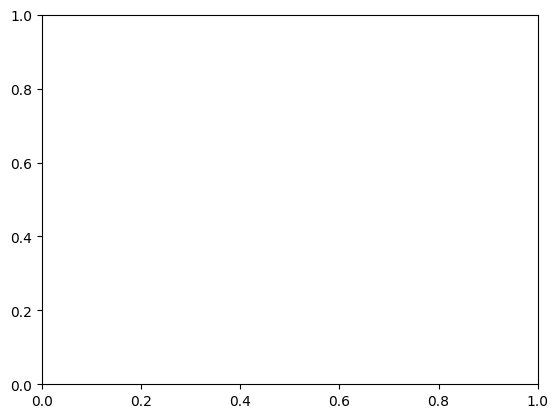

In [62]:
plt.scatter(sneakers['created_at'], sneakers['value_per_item'])